/Users/macos/Financial-Big-Data/.venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


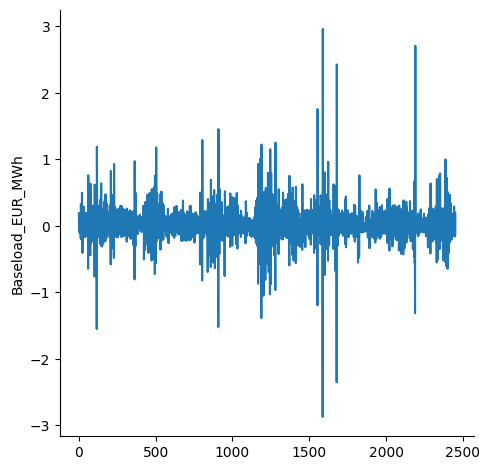

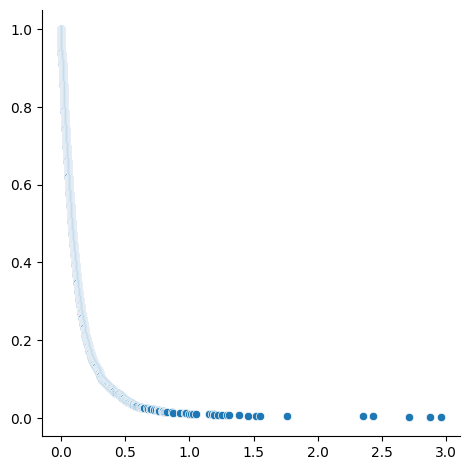

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.distributions.empirical_distribution as sm
import seaborn as sea
import matplotlib.pyplot as plt

data = pd.read_csv("../Data/ogd106_preise_strom_boerse.csv")
logreturns = np.log(data["Baseload_EUR_MWh"].shift(-1))-np.log(data["Baseload_EUR_MWh"])

sea.relplot(logreturns,kind="line")

myecdf = sm.ECDF(np.abs(logreturns[:2451].dropna().to_numpy()))

ax = sea.relplot(x = myecdf.x, y = 1-myecdf.y)